Upload data to sqlite tables.

In [1]:
import pandas as pd
import numpy as np
from IPython import display as dis
import scipy.io.wavfile as wav
import tensorflow as tf
from tensorflow.contrib.legacy_seq2seq.python.ops.seq2seq import basic_rnn_seq2seq
from tensorflow.contrib.rnn import RNNCell, LSTMCell, MultiRNNCell
from scipy import signal 
from librosa import core
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import time

%matplotlib inline

In [2]:
x_y = pd.read_pickle("dataset/x_y.pkl")

In [3]:
time_step = 0
hidden_layers = 1
batch_size = 7
feature_count = 1
latent_dim = 40 
rate=8000

In [4]:
x_y

,sigs,emotion
file_name,,
Ses01F_script01_1_F000,"[[-0.00154565], [-0.00232982], [-0.00185985], ...",Frustration
Ses01F_script01_1_F002,"[[0.00105559], [0.00139954], [0.00106059], [0....",Surprise
Ses01F_script01_1_F003,"[[0.00162135], [0.00178239], [0.000894559], [0...",Surprise
Ses01F_script01_1_F005,"[[0.00254852], [0.00376644], [0.00339257], [0....",Neutral state
Ses01F_script01_1_F006,"[[0.00285482], [0.00479193], [0.00386586], [0....",Neutral state
Ses01F_script01_1_F007,"[[0.00187134], [0.00314571], [0.00163029], [0....",Surprise
Ses01F_script01_1_F008,"[[0.00826302], [0.0147048], [0.0115499], [0.00...",Surprise
Ses01F_script01_1_F009,"[[-0.00121218], [-0.00212365], [-0.00153134], ...",Frustration
Ses01F_script01_1_F010,"[[-0.00103264], [-0.00278232], [-0.00391717], ...",Frustration


In [5]:
dis.Audio(data = x_y.iloc[-1,:].sigs.ravel(), rate = rate )

Signal [-0.0006055   0.0001122  -0.00176181 ..., -0.00279483 -0.00393258  0.        ]


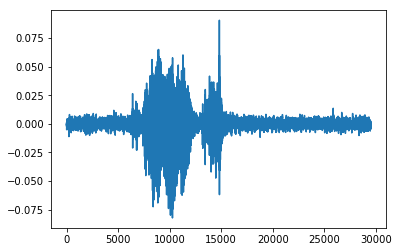

In [6]:
print("Signal",x_y.iloc[-1,:].sigs.ravel())
plt.plot(x_y.iloc[-1,:].sigs.ravel())

In [7]:
x_y.loc[:,"sequence_length"] = None
x_y.loc[:,"max"] = None

time_step = max([sig.shape[0] for sig in x_y.sigs ])
print(time_step)

93498


In [8]:
for index, row in x_y.iterrows():
    sig = row.sigs
    row.sequence_length = sig.shape[0]
    row.max = max(abs(sig))
    sig = sig / row.max
    sig = np.concatenate((sig, np.zeros((time_step - row.sequence_length,1))))
    #sig = np.pad(sig, (0, time_step - row.sequence_length), mode = "constant")
    sig = np.reshape(sig, (1,-1, 1)) 
    row.sigs = sig 

(49, 93498, 1)
Signal [[-0.00668281]
 [ 0.00123836]
 [-0.01944495]
 ..., 
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]] Rate 8000 Max time step: 93498


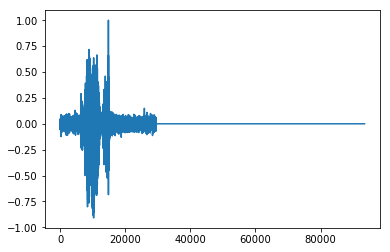

In [9]:
sigs = np.concatenate(x_y.sigs.values)
print(sigs.shape)
print("Signal",sigs[-1], "Rate", rate, "Max time step:", time_step)
plt.plot(sigs[-1])

In [10]:
dis.Audio(data = sigs[-1].ravel(), rate = rate)

In [11]:
le = LabelEncoder()

In [12]:
class Data(object):
    x = sigs + np.random.normal(scale=0.01, size = sigs.shape)
    y_ = sigs
    s = x_y.sequence_length.values
    e = le.fit_transform(x_y.emotion)

In [13]:
print("Signal",Data.x[-1], "Shape", Data.x.shape, "Rate", rate, "Max time step:", time_step)

Signal [[-0.01588102]
 [-0.01365006]
 [-0.01537041]
 ..., 
 [ 0.00725566]
 [-0.00177124]
 [-0.00736503]] Shape (49, 93498, 1) Rate 8000 Max time step: 93498


In [14]:
print(Data.e,Data.e.shape)

[2 6 6 4 4 6 6 2 2 2 2 2 2 4 4 4 4 6 0 4 5 0 0 0 0 0 0 1 3 3 3 3 3 1 3 1 3
 6 5 6 1 1 5 1 1 5 5 5 5] (49,)


In [15]:
dis.Audio(data = Data.x[-1].ravel(), rate = rate)

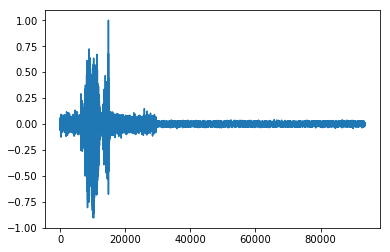

In [16]:
plt.plot(Data.x[-1])

In [17]:
dis.Audio(data = Data.y_[-1].ravel(), rate = rate)

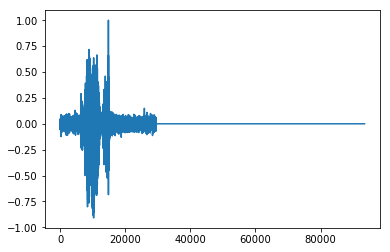

In [18]:
plt.plot(Data.y_[-1])

In [19]:
#["batch_size", "steps", "step_size", "feature_count"]
[batch_size, time_step, feature_count ]

[7, 93498, 1]

In [20]:
class network(object):
    
    def __init__(self):
        pass
            
    def build_layers(self):
        
        tf.reset_default_graph()
        #learning_rate = tf.Variable(initial_value=0.001)

        global time_step 
        global batch_size 
        global hidden_layers
        global step_size
        global latent_dim
        
        with tf.variable_scope("Input"):
            self.x = tf.placeholder("float32", shape=[batch_size, time_step, feature_count], name='x')
            self.y_ = tf.placeholder("float32", shape=[batch_size, time_step, feature_count], name='y')
            self.e_ = tf.placeholder(tf.int32, shape=[batch_size], name='e')
            self.seq_length = tf.placeholder("float32", shape=[batch_size])
            
            self.keep_prob = tf.placeholder("float", name='kp')
            self.lr = tf.placeholder("float", name='lr')
            
        with tf.variable_scope("encoder"):
            enc_lstm = tf.contrib.rnn.LSTMCell(latent_dim)
            
            self.state = enc_lstm.zero_state(batch_size, "float")
            print("State:",self.state)
            
            print("Audio Input:", self.x)
            self.enc_output, self.state = tf.nn.dynamic_rnn(enc_lstm, self.x, initial_state = self.state, 
                                                            sequence_length=self.seq_length, parallel_iterations = 4)
            self.enc_state = self.state
            print("Encoder Output:",self.enc_output)

        with tf.variable_scope("decoder"):
            dec_lstm = tf.contrib.rnn.LSTMCell(latent_dim)
            self.dec_output, self.state = tf.nn.dynamic_rnn(dec_lstm, self.enc_output, initial_state = self.state, 
                                                            sequence_length=self.seq_length, parallel_iterations = 4)
            
            self.dec_output = tf.layers.dense(self.dec_output, units = latent_dim, kernel_regularizer=tf.nn.l2_loss)
            self.output = tf.layers.dense(self.dec_output, units = 1)
            print("Decoder Output:",self.dec_output)
        
        with tf.variable_scope("target"):
            self.hidden_layer = tf.layers.dense(self.enc_state.c, units = latent_dim, kernel_regularizer=tf.nn.l2_loss)
            self.hidden_layer = tf.layers.dense(self.hidden_layer, units = latent_dim, kernel_regularizer=tf.nn.l2_loss)
            self.hidden_layer = tf.layers.dense(self.hidden_layer, units = 40, kernel_regularizer=tf.nn.l2_loss)
            self.e = tf.layers.dense(self.hidden_layer, units = 7)
        
        with tf.variable_scope("Optimize"):
            #loss = tf.contrib.seq2seq.sequence_loss(self.output, self.x, tf.ones(shape=[batch_size, time_step]))
            self.loss = tf.losses.mean_squared_error(self.y_, self.output)
            label_loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = self.e_, logits = self.e))
            self.loss = self.loss + label_loss
            optimizer = tf.train.AdamOptimizer(self.lr)
            self.opti_op = optimizer.minimize(self.loss)
            self.pred = tf.argmax(self.e, 1)
            
        print("Final Output:", self.output)

            
        

In [21]:
import collections

y_pred_list = []
final_state = None
class Train:    
    
    def train(net, epochs, lrs, x, y, s, e):
        global final_state
        
        with tf.Session() as sess:
            
            sess.run(tf.global_variables_initializer())
            for lr in lrs:
                for epoch in range(1, epochs+1):
                    
                    Data.hidden_layer = []
                    Data.pred = []
                    
                    for i in range(0,49,7):
                        x_train = x[i:i+7,...]
                        y_train = y[i:i+7,...]
                        s_train = s[i:i+7]
                        e_train = e[i:i+7]
                        _, state, Data.x_norm, Data.y_norm, Data.y, Data.loss, pred, hidden_layer = sess.run(
                                                [net.opti_op, net.enc_state, 
                                                 net.x, net.y_, 
                                                 net.output, net.loss, net.pred,
                                                 net.hidden_layer], #net.summary_op
                                                  feed_dict={net.x: x_train, 
                                                             net.y_: y_train,
                                                             net.seq_length:s_train,
                                                             net.e_:e_train,
                                                             net.keep_prob:1,
                                                             net.lr:lr})
                        print("Step {} lr {} Loss {}".format(epoch, lr, Data.loss))
                        Data.hidden_layer.append(hidden_layer)
                        Data.pred.append(pred)


In [22]:
import itertools

class Hyperparameters:
    def start_training():
        
        epochs = 5
        lrs = [1e-10, 1e-12]
        n = network()
        n.build_layers()
        
        Train.train(n, epochs, lrs, Data.x, Data.y_, Data.s, Data.e)
            

In [23]:
Hyperparameters.start_training()

State: LSTMStateTuple(c=<tf.Tensor 'encoder/LSTMCellZeroState/zeros:0' shape=(7, 40) dtype=float32>, h=<tf.Tensor 'encoder/LSTMCellZeroState/zeros_1:0' shape=(7, 40) dtype=float32>)
Audio Input: Tensor("Input/x:0", shape=(7, 93498, 1), dtype=float32)
Encoder Output: Tensor("encoder/rnn/transpose:0", shape=(7, 93498, 40), dtype=float32)
Decoder Output: Tensor("decoder/dense/BiasAdd:0", shape=(7, 93498, 40), dtype=float32)
Final Output: Tensor("decoder/dense_2/BiasAdd:0", shape=(7, 93498, 1), dtype=float32)
Step 1 lr 1e-10 Loss 1.9487017393112183
Step 1 lr 1e-10 Loss 1.9491548538208008
Step 1 lr 1e-10 Loss 1.949741005897522
Step 1 lr 1e-10 Loss 1.9607831239700317
Step 1 lr 1e-10 Loss 1.948865532875061
Step 1 lr 1e-10 Loss 1.951542615890503
Step 1 lr 1e-10 Loss 1.9508655071258545
Step 2 lr 1e-10 Loss 1.9487017393112183
Step 2 lr 1e-10 Loss 1.9491548538208008
Step 2 lr 1e-10 Loss 1.949741005897522
Step 2 lr 1e-10 Loss 1.9607831239700317
Step 2 lr 1e-10 Loss 1.948865532875061
Step 2 lr 1e-1

In [24]:
#Data.output = np.array(Data.output)
Data.hidden_layer = np.concatenate(Data.hidden_layer)
Data.pred = np.concatenate(Data.pred)

In [25]:
display("Accuracy", np.mean(np.equal(Data.pred, Data.e)))

'Accuracy'

0.18367346938775511

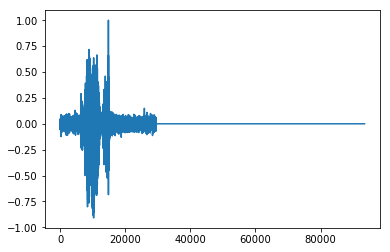

In [26]:
plt.plot(Data.y_[-1])

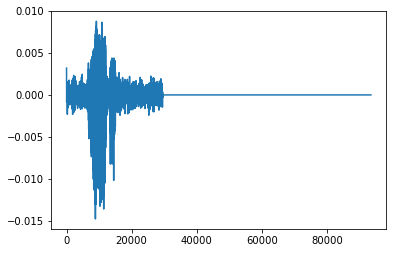

In [27]:
plt.plot(Data.y[-1])

In [28]:
y = Data.x[-1].ravel()
dis.Audio(data = y, rate = rate)

In [29]:
y = Data.y[-1].ravel()
dis.Audio(data = y, rate = rate)

In [30]:
x_y.loc[:,'hidden_layer'] = None

for c, (index, row) in enumerate(x_y.iterrows()):
    row.hidden_layer = Data.hidden_layer[c].reshape((-1,1))
    

x_y.drop("max", axis = 1).to_pickle("dataset/x_y_sample_network_targetted_learned.pkl")
x_y

,sigs,emotion,sequence_length,max,hidden_layer
file_name,,,,,
Ses01F_script01_1_F000,"[[[-0.0118379928172], [-0.0178438518196], [-0....",Frustration,24880,None,"[[-0.000121065], [0.000163691], [3.56971e-05],..."
Ses01F_script01_1_F002,"[[[0.00413123099133], [0.00547735439613], [0.0...",Surprise,41971,None,"[[-0.000646717], [0.000435517], [-0.00161108],..."
Ses01F_script01_1_F003,"[[[0.00364339747466], [0.00400527846068], [0.0...",Surprise,18774,None,"[[-0.00222539], [0.00145696], [-0.00442901], [..."
Ses01F_script01_1_F005,"[[[0.0318707302213], [0.0471015200019], [0.042...",Neutral state,39591,None,"[[0.0026208], [-0.00094719], [0.00512549], [0...."
Ses01F_script01_1_F006,"[[[0.0227973181754], [0.0382662080228], [0.030...",Neutral state,42960,None,"[[-0.00436889], [0.00333594], [-0.0078552], [-..."
Ses01F_script01_1_F007,"[[[0.0107956510037], [0.0181474164128], [0.009...",Surprise,15440,None,"[[0.00107667], [-0.000281473], [0.00263904], [..."
Ses01F_script01_1_F008,"[[[0.0786173790693], [0.139906838536], [0.1098...",Surprise,24560,None,"[[0.000168622], [0.000411021], [0.00106203], [..."
Ses01F_script01_1_F009,"[[[-0.00717511586845], [-0.0125702451915], [-0...",Frustration,25571,None,"[[-0.00182238], [0.00145264], [-0.0037734], [-..."
Ses01F_script01_1_F010,"[[[-0.0120294820517], [-0.0324117988348], [-0....",Frustration,17666,None,"[[0.00316967], [-0.00242157], [0.005541], [0.0..."


In [31]:
actual = le.inverse_transform(Data.e)
pred = le.inverse_transform(Data.pred)



In [32]:
x_y.loc[:,'pred'] = pred

In [33]:
x_y.loc[:,["emotion","pred"]]

,emotion,pred
file_name,,
Ses01F_script01_1_F000,Frustration,Happiness
Ses01F_script01_1_F002,Surprise,Sadness
Ses01F_script01_1_F003,Surprise,Sadness
Ses01F_script01_1_F005,Neutral state,Frustration
Ses01F_script01_1_F006,Neutral state,Sadness
Ses01F_script01_1_F007,Surprise,Frustration
Ses01F_script01_1_F008,Surprise,Happiness
Ses01F_script01_1_F009,Frustration,Sadness
Ses01F_script01_1_F010,Frustration,Excited
